Write a Python program that performs the following tasks:
 1. Generates random positions for 10 nodes within a 2D space using TensorFlow.
 2. Converts the TensorFlow tensor to a NumPy array for plotting.
 3. Defines a set of edges to connect these nodes in a graph.
 4.Uses Matplotlib to create a plot that visualizes the nodes and edges, where:
 Nodes are represented by red dots with black edges.
 Edges are plotted as blue lines.
 Each node is annotated with its index.
 5. Customizes the plot with a title and removes the axis.

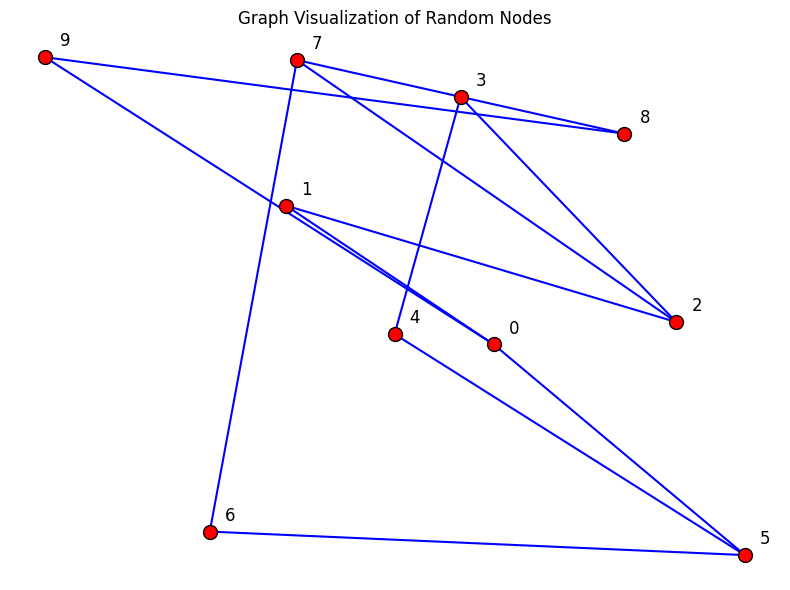

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate random positions for 10 nodes within a 2D space using TensorFlow
num_nodes = 10
positions = tf.random.uniform((num_nodes, 2), minval=0, maxval=10)

# Step 2: Convert the TensorFlow tensor to a NumPy array for plotting
positions_np = positions.numpy()

# Step 3: Define a set of edges (as pairs of node indices)
edges = [(0, 1), (1, 2), (2, 3), (3, 4),
         (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 0),
         (0, 5), (2, 7)]  # You can add any edges

# Step 4: Use Matplotlib to create a plot
plt.figure(figsize=(8, 6))

# Plot edges as blue lines
for start, end in edges:
    x_values = [positions_np[start][0], positions_np[end][0]]
    y_values = [positions_np[start][1], positions_np[end][1]]
    plt.plot(x_values, y_values, 'b-')  # blue line

# Plot nodes as red dots with black edges
plt.scatter(positions_np[:, 0], positions_np[:, 1], color='red', edgecolors='black', s=100, zorder=3)

# Annotate nodes with their indices
for i, (x, y) in enumerate(positions_np):
    plt.text(x + 0.2, y + 0.2, str(i), fontsize=12, color='black')

# Step 5: Customize the plot
plt.title("Graph Visualization of Random Nodes")
plt.axis('off')  # Remove axis
plt.tight_layout()
plt.show()


Write a Python script that performs the following tasks:
 1. Generates random positions for 8 nodes in a 2D space using TensorFlow.
 2. Converts the TensorFlow tensor of node positions into a NumPy array for plotting.
 3. Defines a set of directed edges to connect these nodes in a graph.
 4. Uses Matplotlib to create a plot that visualizes the directed graph where:
 Directed edges are represented by arrows.
 Nodes are shown as red dots with black edges.
 Each node is annotated with its index.
 5. Customizes the plot with a title and removes the axis.

[[3.9857209  1.5346396 ]
 [3.0055249  6.580945  ]
 [0.96227884 7.7840176 ]
 [2.765423   7.2863746 ]
 [0.7144153  6.271405  ]
 [1.9387686  2.7326477 ]
 [9.937171   9.68452   ]
 [3.937217   1.3219225 ]]


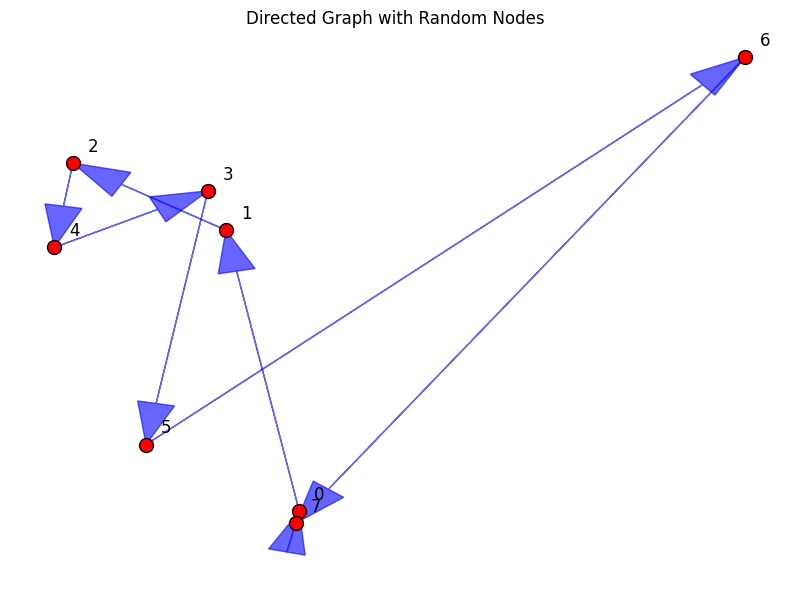

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate random positions for 8 nodes in 2D space using TensorFlow
num_nodes = 8
positions = tf.random.uniform((num_nodes, 2), minval=0, maxval=10)

# Step 2: Convert TensorFlow tensor to NumPy array
positions_np = positions.numpy()
print(positions_np)
# Step 3: Define directed edges (source -> target)
edges = [(0, 1), (1, 2), (2, 4), (3, 5), (5, 6), (6, 7), (7, 0), (4, 3)]

# Step 4: Visualize the directed graph using Matplotlib
plt.figure(figsize=(8, 6))

# Plot directed edges as arrows
for start, end in edges:
    x_start, y_start = positions_np[start]
    x_end, y_end = positions_np[end]
    dx = x_end - x_start
    dy = y_end - y_start
    plt.arrow(x_start, y_start, dx, dy,
              head_width=0.5, length_includes_head=True,
              color='blue', alpha=0.6)

# Plot nodes as red dots with black edges
plt.scatter(positions_np[:, 0], positions_np[:, 1],
            color='red', edgecolors='black', s=100, zorder=3)

# Annotate nodes with their indices
for i, (x, y) in enumerate(positions_np):
    plt.text(x + 0.2, y + 0.2, str(i), fontsize=12, color='black')

# Step 5: Customize plot
plt.title("Directed Graph with Random Nodes")
plt.axis('off')
plt.tight_layout()
plt.show()


Write a Python program that performs the following tasks to visualize a tree graph:
 1. Generates random positions for nodes in a tree structure using TensorFlow. The tree should have 4 levels.
 2. Converts the TensorFlow tensors of node positions into a NumPy array for plotting.
 3. Defines edges for the tree, connecting nodes from each level to their parent nodes.
 4. Uses Matplotlib to create a plot that visualizes the tree graph where:
 Edges are represented by blue lines.
 Nodes are shown as red dots with black edges.
 Each node is annotated with its index.
 5. Customizes the plot with a title and removes the axis

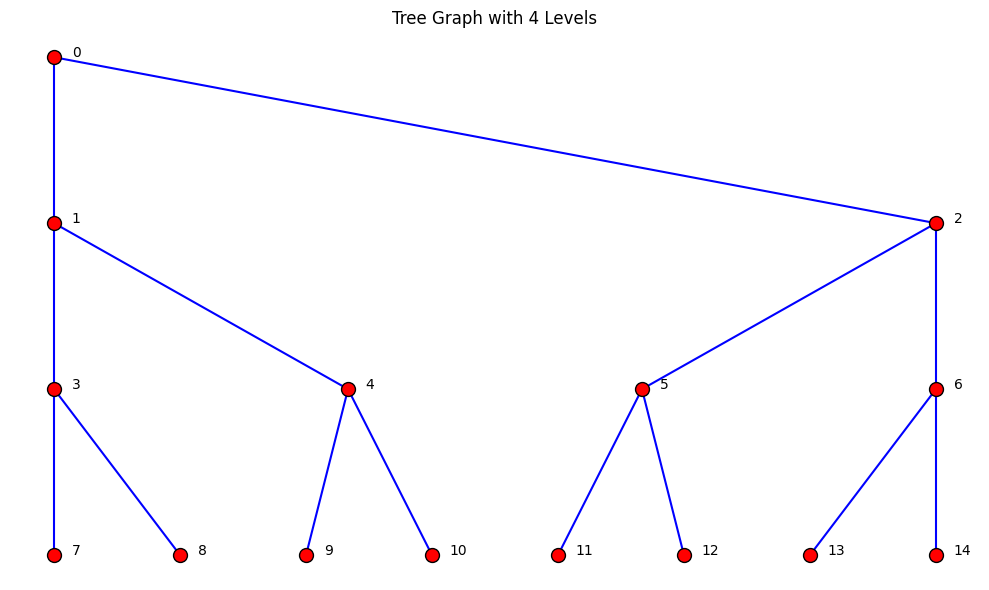

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the tree structure (4 levels)
levels = 4
nodes_per_level = [1, 2, 4, 8]  # Binary tree-like structure

# Calculate total number of nodes
total_nodes = sum(nodes_per_level)

# Generate x, y positions for each node using TensorFlow
positions = []
y = 0
node_index = 0
for level, count in enumerate(nodes_per_level):
    x_positions = tf.linspace(0.0, 10.0, count)
    y_position = tf.fill([count], float(levels - level))  # y = level (reversed so root is on top)
    level_positions = tf.stack([x_positions, y_position], axis=1)
    positions.append(level_positions)
positions = tf.concat(positions, axis=0)

# Step 2: Convert TensorFlow tensor to NumPy array
positions_np = positions.numpy()

# Step 3: Define edges to connect each child to its parent
edges = []
start_index = 0
next_index = 1

for level in range(1, levels):  # Start from level 1
    parent_count = nodes_per_level[level - 1]
    child_count = nodes_per_level[level]

    for i in range(child_count):
        parent = start_index + (i // 2)  # Binary tree parent
        child = next_index + i
        edges.append((parent, child))

    start_index += parent_count
    next_index += child_count

# Step 4: Plot the tree using Matplotlib
plt.figure(figsize=(10, 6))

# Plot edges
for start, end in edges:
    x_values = [positions_np[start][0], positions_np[end][0]]
    y_values = [positions_np[start][1], positions_np[end][1]]
    plt.plot(x_values, y_values, 'b-')  # blue lines

# Plot nodes
plt.scatter(positions_np[:, 0], positions_np[:, 1],
            color='red', edgecolors='black', s=100, zorder=3)

# Annotate nodes with their indices
for i, (x, y) in enumerate(positions_np):
    plt.text(x + 0.2, y, str(i), fontsize=10, color='black')

# Step 5: Customize plot
plt.title("Tree Graph with 4 Levels")
plt.axis('off')
plt.tight_layout()
plt.show()


 Write a python code to generate 3D variable using tensorflow

In [ ]:
import tensorflow as tf

# Define the shape of the 3D variable (e.g., 3 layers, 4 rows, 5 columns)
shape = (3, 4, 5)

# Initialize the 3D variable with random values (uniform distribution)
tensor_3d = tf.Variable(tf.random.uniform(shape, minval=0, maxval=1), name='my_3d_variable')

# Print the 3D variable
print("3D TensorFlow Variable:")
print(tensor_3d)


3D TensorFlow Variable:
<tf.Variable 'my_3d_variable:0' shape=(3, 4, 5) dtype=float32, numpy=
array([[[0.49748707, 0.98385155, 0.05611956, 0.8754257 , 0.65952146],
        [0.9529325 , 0.372715  , 0.6550039 , 0.56516457, 0.36709583],
        [0.62398505, 0.3096007 , 0.95482194, 0.61783075, 0.9486599 ],
        [0.32351494, 0.64277434, 0.28088534, 0.9411478 , 0.29504144]],

       [[0.0292424 , 0.54048085, 0.24098766, 0.09799671, 0.43097353],
        [0.01103246, 0.4674883 , 0.09146404, 0.51132965, 0.80994   ],
        [0.04791069, 0.76942885, 0.29518247, 0.03255272, 0.04352713],
        [0.47043097, 0.3498578 , 0.6992378 , 0.8720546 , 0.4137665 ]],

       [[0.7770698 , 0.48884392, 0.18235862, 0.73893356, 0.00255394],
        [0.42777514, 0.7042078 , 0.07193542, 0.22652614, 0.92565286],
        [0.6206565 , 0.68953943, 0.81784534, 0.8064114 , 0.76551557],
        [0.47906995, 0.92675686, 0.623559  , 0.4252671 , 0.42044127]]],
      dtype=float32)>


Write a python code that Creates a 3D  tensor with random values from a normal distribution.

In [ ]:
import tensorflow as tf

# Define the shape of the 3D tensor: (depth, rows, columns)
shape = (3, 4, 5)  # 3 blocks, each 4x5

# Create a 3D tensor with values from a normal distribution (mean=0, stddev=1)
tensor_3d = tf.random.normal(shape, mean=0.0, stddev=1.0, dtype=tf.float32)

# Display the tensor
print("3D Tensor with Random Normal Values:")
print(tensor_3d)


3D Tensor with Random Normal Values:
tf.Tensor(
[[[ 0.14037547  0.1632967  -1.2245196   0.82227457 -0.38791344]
  [ 0.70640475 -0.95959586  1.1522679  -0.8739329   0.04512664]
  [ 1.5046169   0.89941716  0.01369116 -1.8586997  -0.7622825 ]
  [-0.63401085  0.11283663 -1.0334343  -0.9373906   0.99032515]]

 [[-0.2819836  -0.27007705  1.4283384  -0.5055617  -1.2566583 ]
  [-0.6597618  -0.27281556  1.271719    0.51916057  0.4517869 ]
  [ 0.58827937  0.5839043  -0.3563569   1.2022192  -0.7313549 ]
  [ 1.7109478  -1.0138144   1.4914244   0.73994017  0.8320922 ]]

 [[ 0.2581003   0.5628493  -0.34883344  0.18656594 -2.0952888 ]
  [ 0.4395099  -0.08770062  1.8119673   1.5046221  -0.07295142]
  [-0.61278963 -0.08073486 -0.05762897  1.427747   -1.4676458 ]
  [-0.02224922  0.5534984  -0.22802994  0.05553131  0.23697792]]], shape=(3, 4, 5), dtype=float32)
